In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!pwd

/content/gdrive/My Drive/XB00036


In [9]:
%cd/content/gdrive/MyDrive/XB00036

/content/gdrive/MyDrive/XB00036


In [22]:
import pandas as pd

path = './data/market-price.csv'
bitcoin_df = pd.read_csv(path, names = ['day', 'price'])

bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [11]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [12]:
bitcoin_df.head()       # 위부분 출력

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [13]:
bitcoin_df.tail()      # 아랫부분 출력

,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


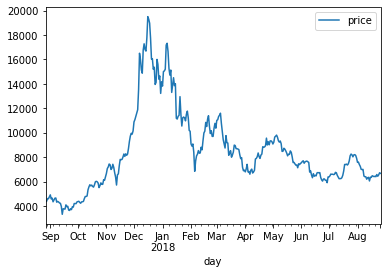

In [14]:
# day 피처를 시계열 자료형(datatime)으로 변환    시간형으로 표현되었었던 것이 날짜형으로 표기됨
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 피처를 데이터 프레임의 인덱스로 설정
bitcoin_df.set_index('day', drop= True, inplace = True)

# 일자별 비트코인 시세를 꺾은선 그래프로 시각화
%matplotlib inline

import matplotlib.pyplot as plt

bitcoin_df.plot()
plt.show()

In [15]:
# 경고문 무시
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(bitcoin_df.price.values, order = (3,1,3))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2779.201
Method:                       css-mle   S.D. of innovations            500.312
Date:                Wed, 13 Oct 2021   AIC                           5574.402
Time:                        00:39:40   BIC                           5605.579
Sample:                             1   HQIC                          5586.794
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3991     27.641      0.232      0.817     -47.777      60.575
ar.L1.D.y     -0.2908      0.154     -1.889      0.060      -0.593       0.011
ar.L2.D.y     -0.6372      0.077     -8.279      0.000      -0.788      -0.486
ar.L3.D.y     -0.7095      0.148     -4.785      0.000      -1.000      -0.419
ma.L1.D.y      0.3949      0.140      2.813      0.005       0.120       0.670
ma.L2.D.y      0.6430      0.071      9.093      0.000       0.504       0.782
ma.L3.D.y      0.7423      0.131      5.660      0.000       0.485       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2306           -0.9918j            1.0183           -0.2136
AR.2            0.2306           +0.9918j            1.0183            0.2136
AR.3           -1.3594           -0.0000j            1.3594           -0.5000
MA.1            0.2051           -1.0067j            1.0274           -0.2180
MA.2            0.2051           +1.0067j            1.0274            0.2180
MA.3           -1.2764           -0.0000j            1.2764           -0.5000
-----------------------------------------------------------------------------
"""

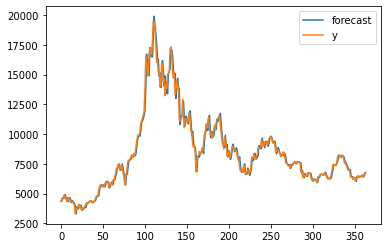

In [16]:
fig1 = model_fit.plot_predict()

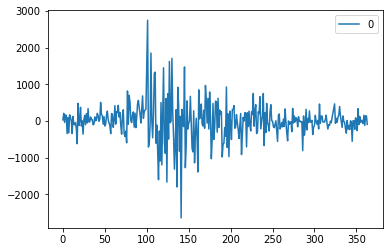

In [17]:
# 잔차(잔차가 작을 수록 훈련을 잘시킨 것)

fig2 = pd.DataFrame(model_fit.resid).plot()

In [18]:
# 비트코인 시세 예측하기(중간에 _는 무시하고 건너뛴다는 의미)

pred_y, _, conf_int = model_fit.forecast(steps = 5)
pred_y_lower = conf_int[:, 0]
pred_y_upper = conf_int[:, 1]
pred_y

array([6668.32443022, 6630.28292781, 6624.45373994, 6670.7806457 ,
       6704.88818595])

In [19]:
test_path = './data/market-price-test.csv'
test_df = pd.read_csv(test_path, names = ['day', 'price'])
test_y = test_df.price.to_numpy()

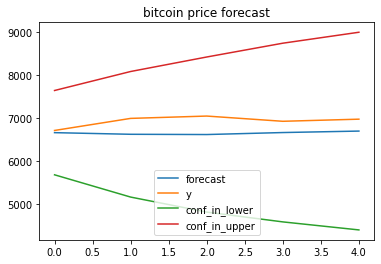

In [20]:
plt.plot(pred_y, label = 'forecast')
plt.plot(test_y, label = 'y')
plt.plot(pred_y_lower, label = 'conf_in_lower')
plt.plot(pred_y_upper, label = 'conf_in_upper')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()


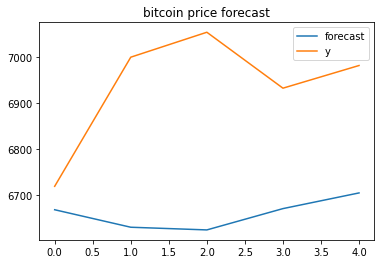

In [24]:
plt.plot(pred_y, label = 'forecast')
plt.plot(test_y, label = 'y')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

In [29]:
from fbprophet import Prophet

path = './data/market-price.csv'
bitcoin_df = pd.read_csv(path, names = ['ds', 'y'])
bitcoin_df.info()

prophet = Prophet(seasonality_mode = 'multiplicative',
                  yearly_seasonality = True,
                  weekly_seasonality = True,
                  daily_seasonality = True,
                  changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      365 non-null    object 
 1   y       365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [44]:
future_data = prophet.make_future_dataframe(periods=5,freq = 'd')
future_data.info()
future_data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      370 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


,ds
365,2018-08-27
366,2018-08-28
367,2018-08-29
368,2018-08-30
369,2018-08-31


In [45]:
forecast_data = prophet.predict(future_data)
forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          370 non-null    datetime64[ns]
 1   trend                       370 non-null    float64       
 2   yhat_lower                  370 non-null    float64       
 3   yhat_upper                  370 non-null    float64       
 4   trend_lower                 370 non-null    float64       
 5   trend_upper                 370 non-null    float64       
 6   daily                       370 non-null    float64       
 7   daily_lower                 370 non-null    float64       
 8   daily_upper                 370 non-null    float64       
 9   multiplicative_terms        370 non-null    float64       
 10  multiplicative_terms_lower  370 non-null    float64       
 11  multiplicative_terms_upper  370 non-null    float64       

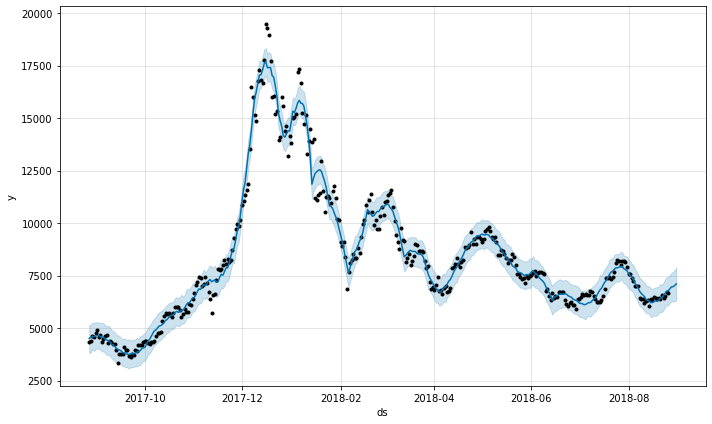

In [46]:
fig3 = prophet.plot(forecast_data)


In [47]:
forecast_data.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
360,2018-08-22,579.818423,5765.823487,7056.236017,579.818423,579.818423,10.907431,10.907431,10.907431,10.116590,10.116590,10.116590,-0.055193,-0.055193,-0.055193,-0.735648,-0.735648,-0.735648,0.0,0.0,0.0,6445.603647
361,2018-08-23,582.869521,5858.520877,7158.564209,582.869521,582.869521,10.907431,10.907431,10.907431,10.217431,10.217431,10.217431,-0.029402,-0.029402,-0.029402,-0.660598,-0.660598,-0.660598,0.0,0.0,0.0,6538.298694
362,2018-08-24,585.920620,6016.256721,7321.603008,585.920620,585.920620,10.907431,10.907431,10.907431,10.366844,10.366844,10.366844,0.039476,0.039476,0.039476,-0.580063,-0.580063,-0.580063,0.0,0.0,0.0,6660.068528
363,2018-08-25,588.971718,6094.851784,7430.688175,588.971718,588.971718,10.907431,10.907431,10.907431,10.472413,10.472413,10.472413,0.064010,0.064010,0.064010,-0.499029,-0.499029,-0.499029,0.0,0.0,0.0,6756.926780
364,2018-08-26,592.022817,6077.201095,7410.433659,592.022817,592.022817,10.907431,10.907431,10.907431,10.447592,10.447592,10.447592,-0.037457,-0.037457,-0.037457,-0.422382,-0.422382,-0.422382,0.0,0.0,0.0,6777.235659
365,2018-08-27,595.073916,6209.778324,7525.853419,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6275.671372,7622.777576,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6264.739388,7681.854778,601.176113,601.176113,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6273.897819,7734.906175,602.121870,605.042899,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6305.017834,7899.116323,595.535398,619.596922,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [49]:
forecast_data[-5:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,595.073916,6209.778324,7525.853419,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6275.671372,7622.777576,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6264.739388,7681.854778,601.176113,601.176113,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6273.897819,7734.906175,602.121870,605.042899,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6305.017834,7899.116323,595.535398,619.596922,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [51]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,595.073916,6209.778324,7525.853419,595.073916,595.073916,10.907431,10.907431,10.907431,10.544862,10.544862,10.544862,-0.007796,-0.007796,-0.007796,-0.354773,-0.354773,-0.354773,0.0,0.0,0.0,6870.046369
366,2018-08-28,598.125014,6275.671372,7622.777576,598.125014,598.125014,10.907431,10.907431,10.907431,10.633309,10.633309,10.633309,0.026363,0.026363,0.026363,-0.300485,-0.300485,-0.300485,0.0,0.0,0.0,6958.173352
367,2018-08-29,601.176113,6264.739388,7681.854778,601.176113,601.176113,10.907431,10.907431,10.907431,10.588920,10.588920,10.588920,-0.055193,-0.055193,-0.055193,-0.263318,-0.263318,-0.263318,0.0,0.0,0.0,6966.981989
368,2018-08-30,604.227211,6273.897819,7734.906175,602.121870,605.042899,10.907431,10.907431,10.907431,10.631542,10.631542,10.631542,-0.029402,-0.029402,-0.029402,-0.246487,-0.246487,-0.246487,0.0,0.0,0.0,7028.094432
369,2018-08-31,607.278310,6305.017834,7899.116323,595.535398,619.596922,10.907431,10.907431,10.907431,10.694373,10.694373,10.694373,0.039476,0.039476,0.039476,-0.252535,-0.252535,-0.252535,0.0,0.0,0.0,7101.738804


In [52]:
pred_y2 = forecast_data.yhat.values[-5:]
pred_y2_lower = forecast_data.yhat_lower.values[-5:]
pred_y2_upper = forecast_data.yhat_upper.values[-5:]


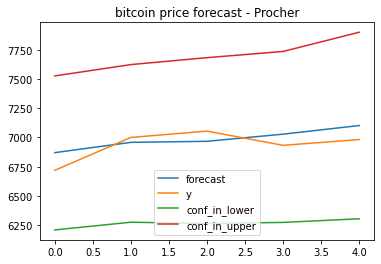

In [57]:
plt.plot(pred_y2, label = 'forecast')
plt.plot(test_y, label = 'y')
plt.plot(pred_y2_lower, label = 'conf_in_lower')
plt.plot(pred_y2_upper, label = 'conf_in_upper')
plt.title('bitcoin price forecast - Procher')
plt.legend()
plt.show()

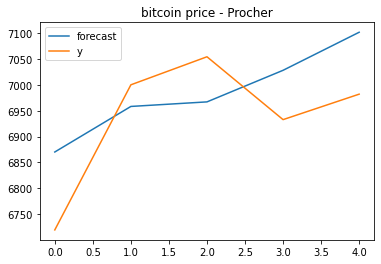

In [58]:
plt.plot(pred_y2, label = 'forecast')
plt.plot(test_y, label = 'y')
plt.title('bitcoin price - Procher')
plt.legend()
plt.show()


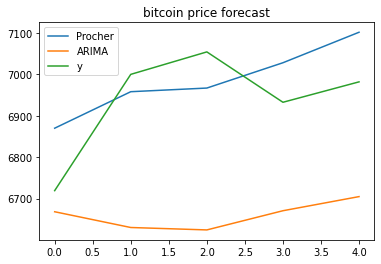

In [60]:
plt.plot(pred_y2, label = 'Procher')
plt.plot(pred_y, label = 'ARIMA')
plt.plot(test_y, label = 'y')
plt.title('bitcoin price forecast')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE')
print('-ARIMA :', sqrt(mean_squared_error(pred_y, test_y)))
print('-Prophet :', sqrt(mean_squared_error(pred_y2, test_y)))


RMSE
-ARIMA : 306.40043031665004
-Prophet : 105.41853842279897
